## Car Milage Prediction

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project predicts a car milage given other variables such as car name, model year, acceleration, weight, horsepower and displacement.


### 2) Data Collection
- The data consists of 9 column and 398 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [39]:
df = pd.read_csv('data/auto-mpg.csv')

#### Show Top 5 Records

In [40]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


#### Shape of the dataset

In [41]:
df.shape

(398, 9)

### 2.2 Dataset information

- mpg (miles per gallon): continuous
- cylinders: multi-value discret
- displacement (engine displacement - inches): continuous
- horsepower: continuous
- weight (vehichle weight - lbs): continuous
- acceleration (time to accelerate from 0 to 60 mph - seconds): continous
- model year: multi-value discret
- origin (origin of car - 1:America, 2:Europe, 3:Japan): multi-value discrete
- car name: string

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [42]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [43]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [44]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


### 3.4 Checking the number of unique values of each column

In [45]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model year       13
origin            3
car name        305
dtype: int64

### 3.5 Check statistics of data set

In [46]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


### Insight

### 3.7 Exploring Data

In [47]:
df['origin'] = df['origin'].replace({1:'America', 2:'Europe', 3:'Japan'})
df = df.drop('car name', axis = 1)

In [48]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,America
1,15.0,8,350.0,165,3693,11.5,70,America
2,18.0,8,318.0,150,3436,11.0,70,America
3,16.0,8,304.0,150,3433,12.0,70,America
4,17.0,8,302.0,140,3449,10.5,70,America


In [49]:
print("Categories in 'cylinders' variable:     ",end=" " )
print(df['cylinders'].unique())

print("Categories in 'origin' variable:  ",end=" ")
print(df['origin'].unique())

Categories in 'cylinders' variable:      [8 4 6 3 5]
Categories in 'origin' variable:   ['America' 'Japan' 'Europe']


In [50]:
# check every variable in the column horsepower
hpisdigit = pd.DataFrame(df.horsepower.str.isdigit())
hpisdigit

,horsepower
0,True
1,True
2,True
3,True
4,True
...,...
393,True
394,True
395,True
396,True


In [51]:
# find the variables that are not integers in the horse power column
df[hpisdigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,?,2046,19.0,71,America
126,21.0,6,200.0,?,2875,17.0,74,America
330,40.9,4,85.0,?,1835,17.3,80,Europe
336,23.6,4,140.0,?,2905,14.3,80,America
354,34.5,4,100.0,?,2320,15.8,81,Europe
374,23.0,4,151.0,?,3035,20.5,82,America


In [53]:
# replace missing values in horse power column
df = df.replace('?', np.nan)

df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())
df.isnull().sum()
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin           object
dtype: object

In [54]:
df['horsepower'] = df['horsepower'].astype('float64')
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin           object
dtype: object

In [55]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']

We have 1 categorical features : ['origin']


In [56]:
df.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,America
1,15.0,8,350.0,165.0,3693,11.5,70,America


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_America,origin_Europe,origin_Japan
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,1,0,0


### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

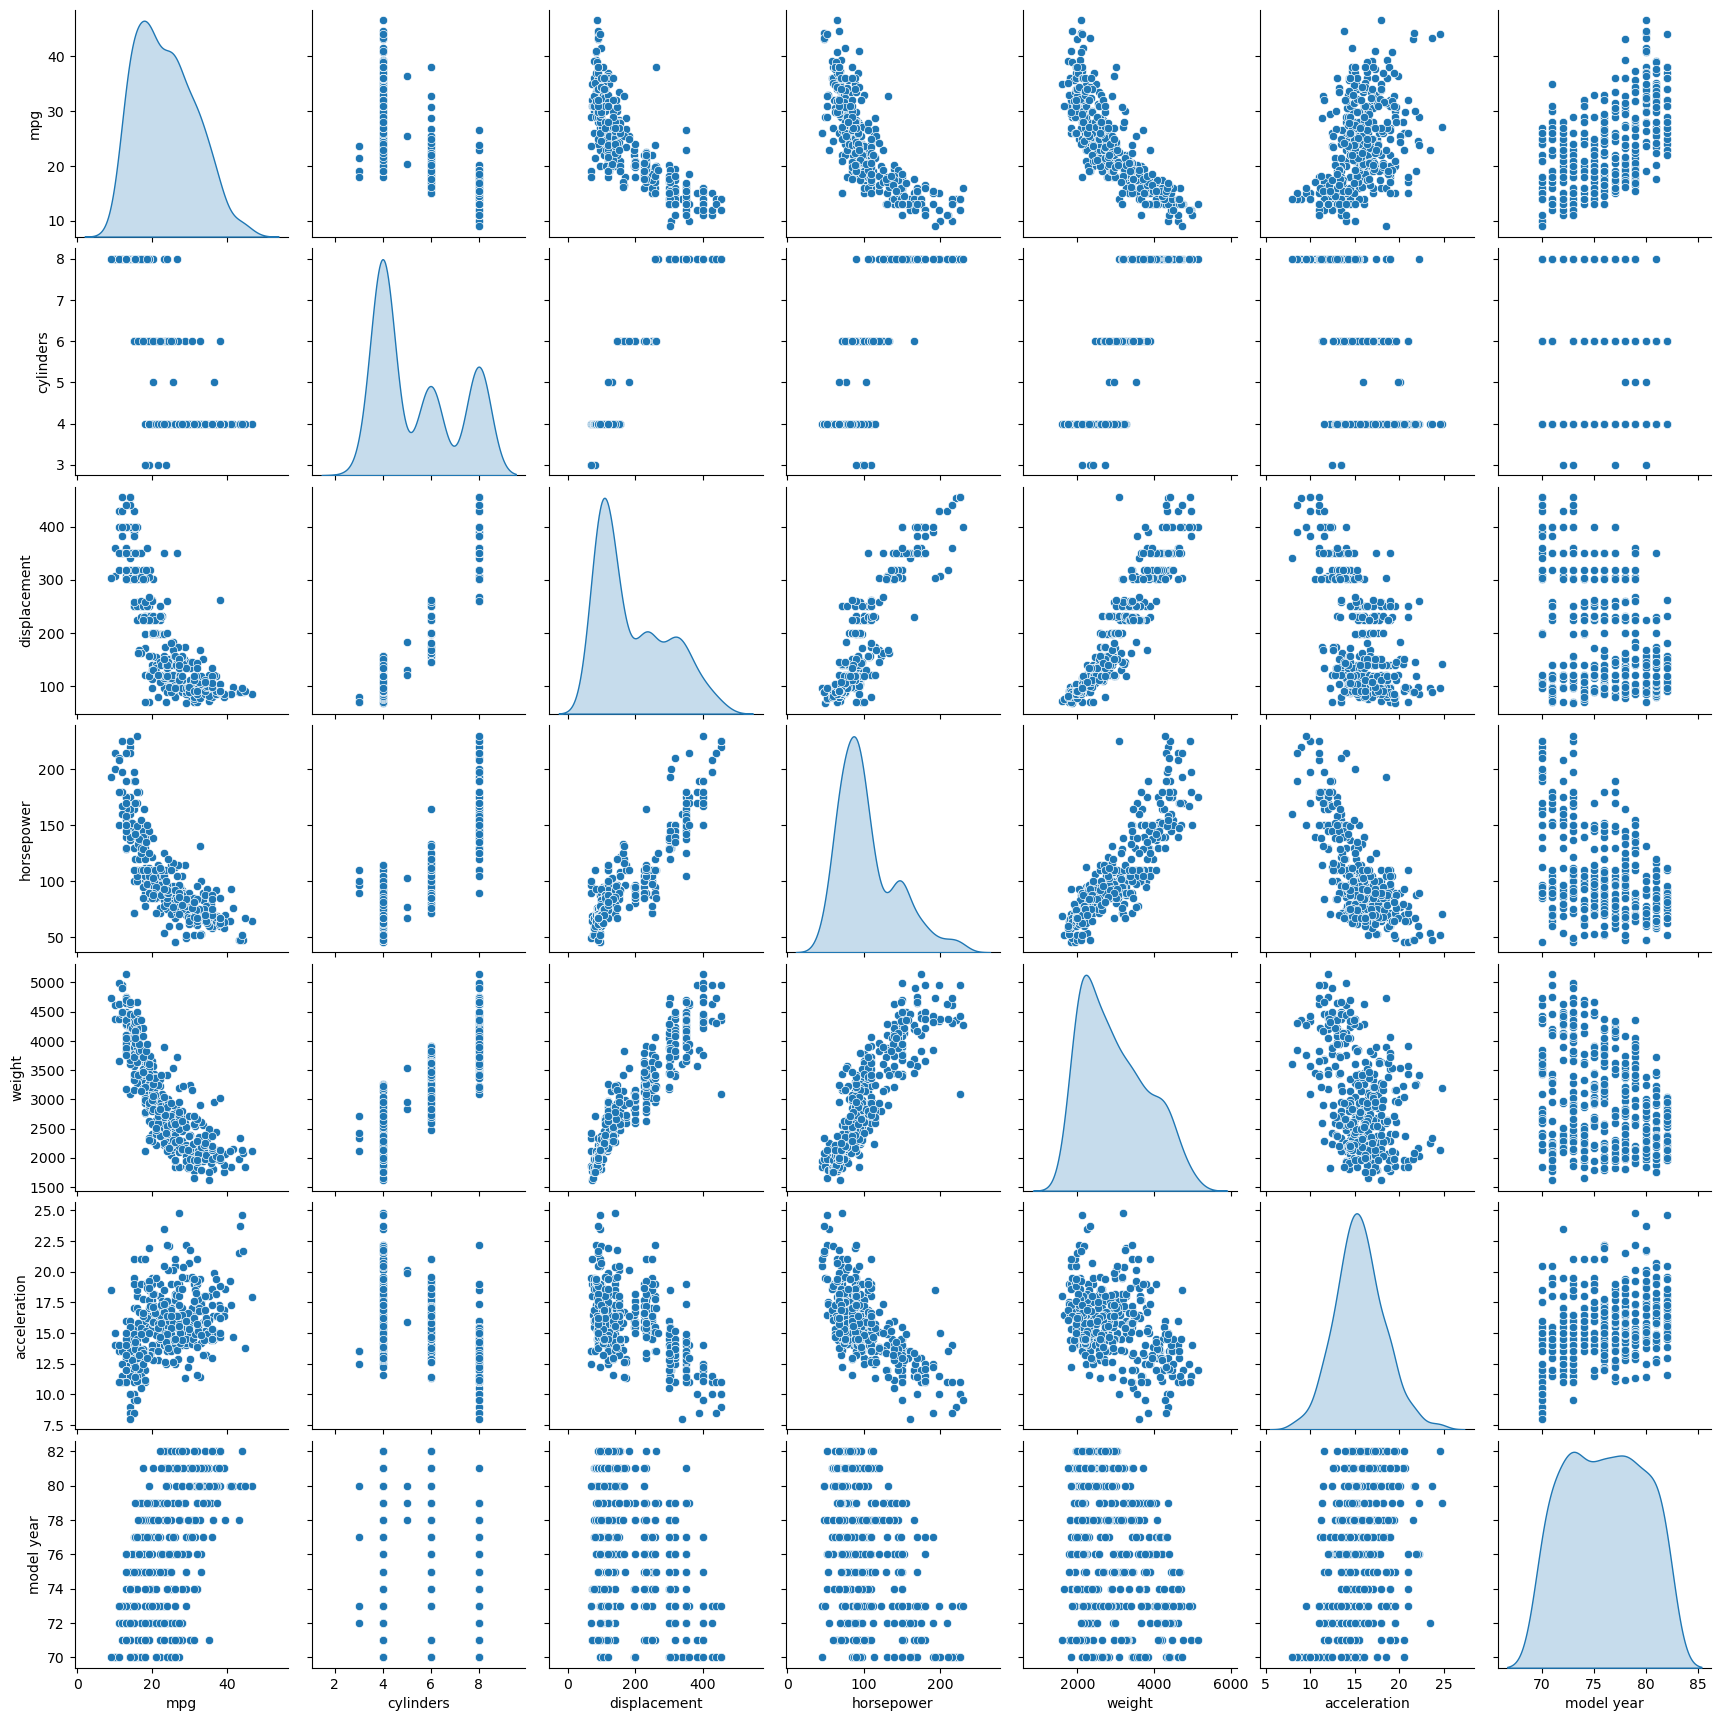

In [32]:
# Bivariate plot: it creates a dashboard reflecting useful information about the  dimensions
data_attr = df.iloc[:, 0:7]
sns.pairplot(data_attr, diag_kind = 'kde') # diagonal kernel density estimator

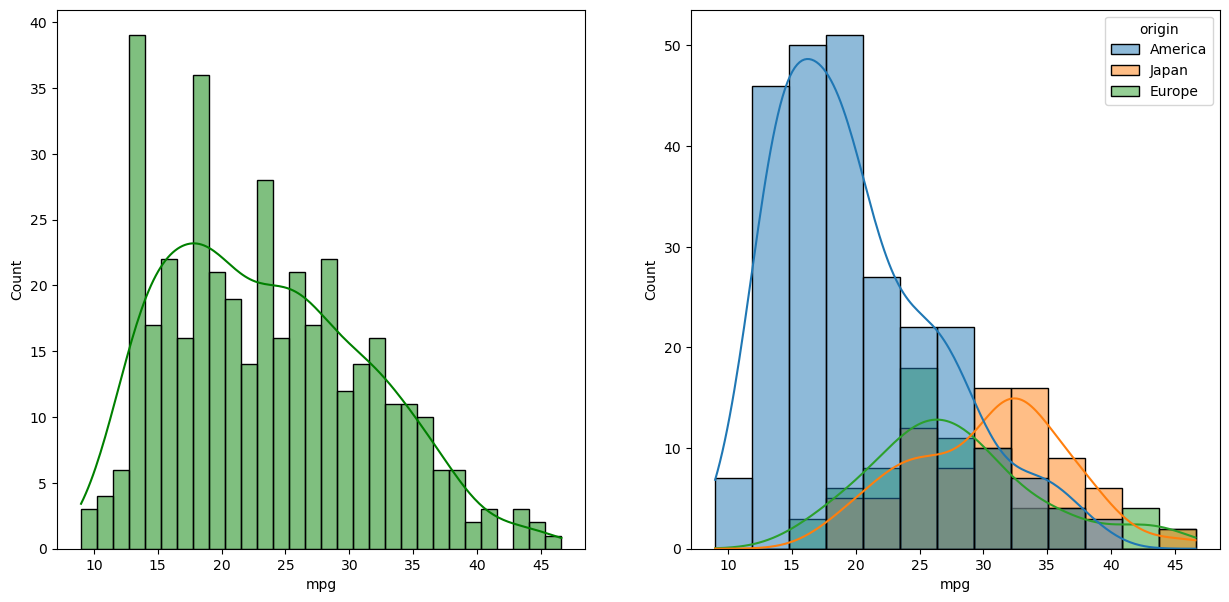

In [57]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='mpg',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='mpg',kde=True,hue='origin')
plt.show()

#####  Insights
- More cars from America cover less milage per gallon.
- While more cars from Japan cover more milage per gallon.

#### 4.2 Maximumum score of students in all three subjects

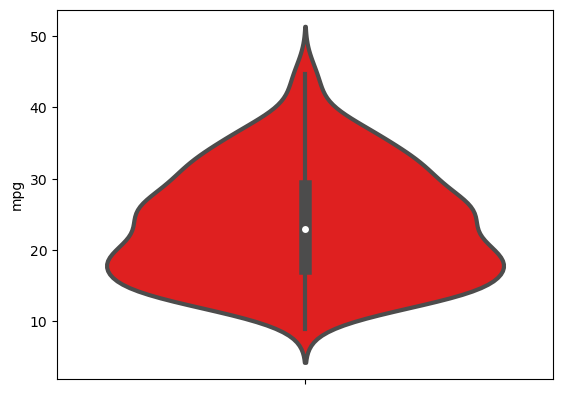

In [59]:

sns.violinplot(y='mpg',data=df,color='red',linewidth=3)
plt.show()

#### Insights
- From the above plot we can see that the maximum milage per gallon is around 50

#### 4.3 Multivariate analysis using pieplot

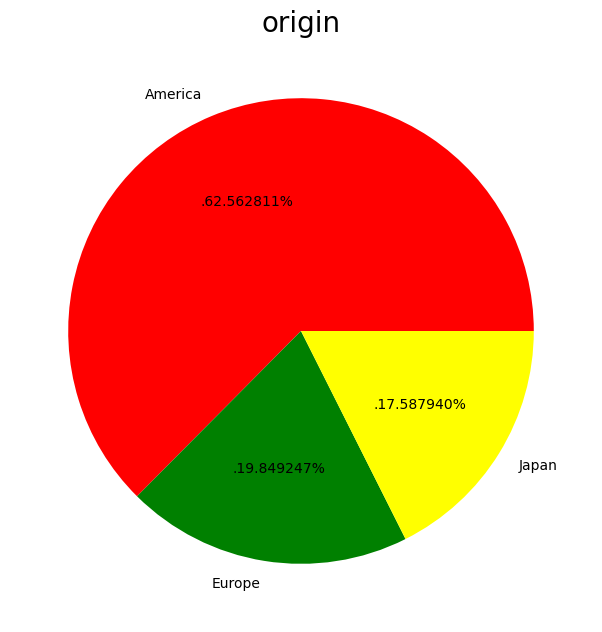

In [61]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['origin'].value_counts()
labels = 'America', 'Europe', 'Japan'
color = ['red','green', 'yellow']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('origin', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

#####  Insights
- The highest proportion of cars are from America, with the least proportion from Japan

#### 4.1 CHECKING OUTLIERS

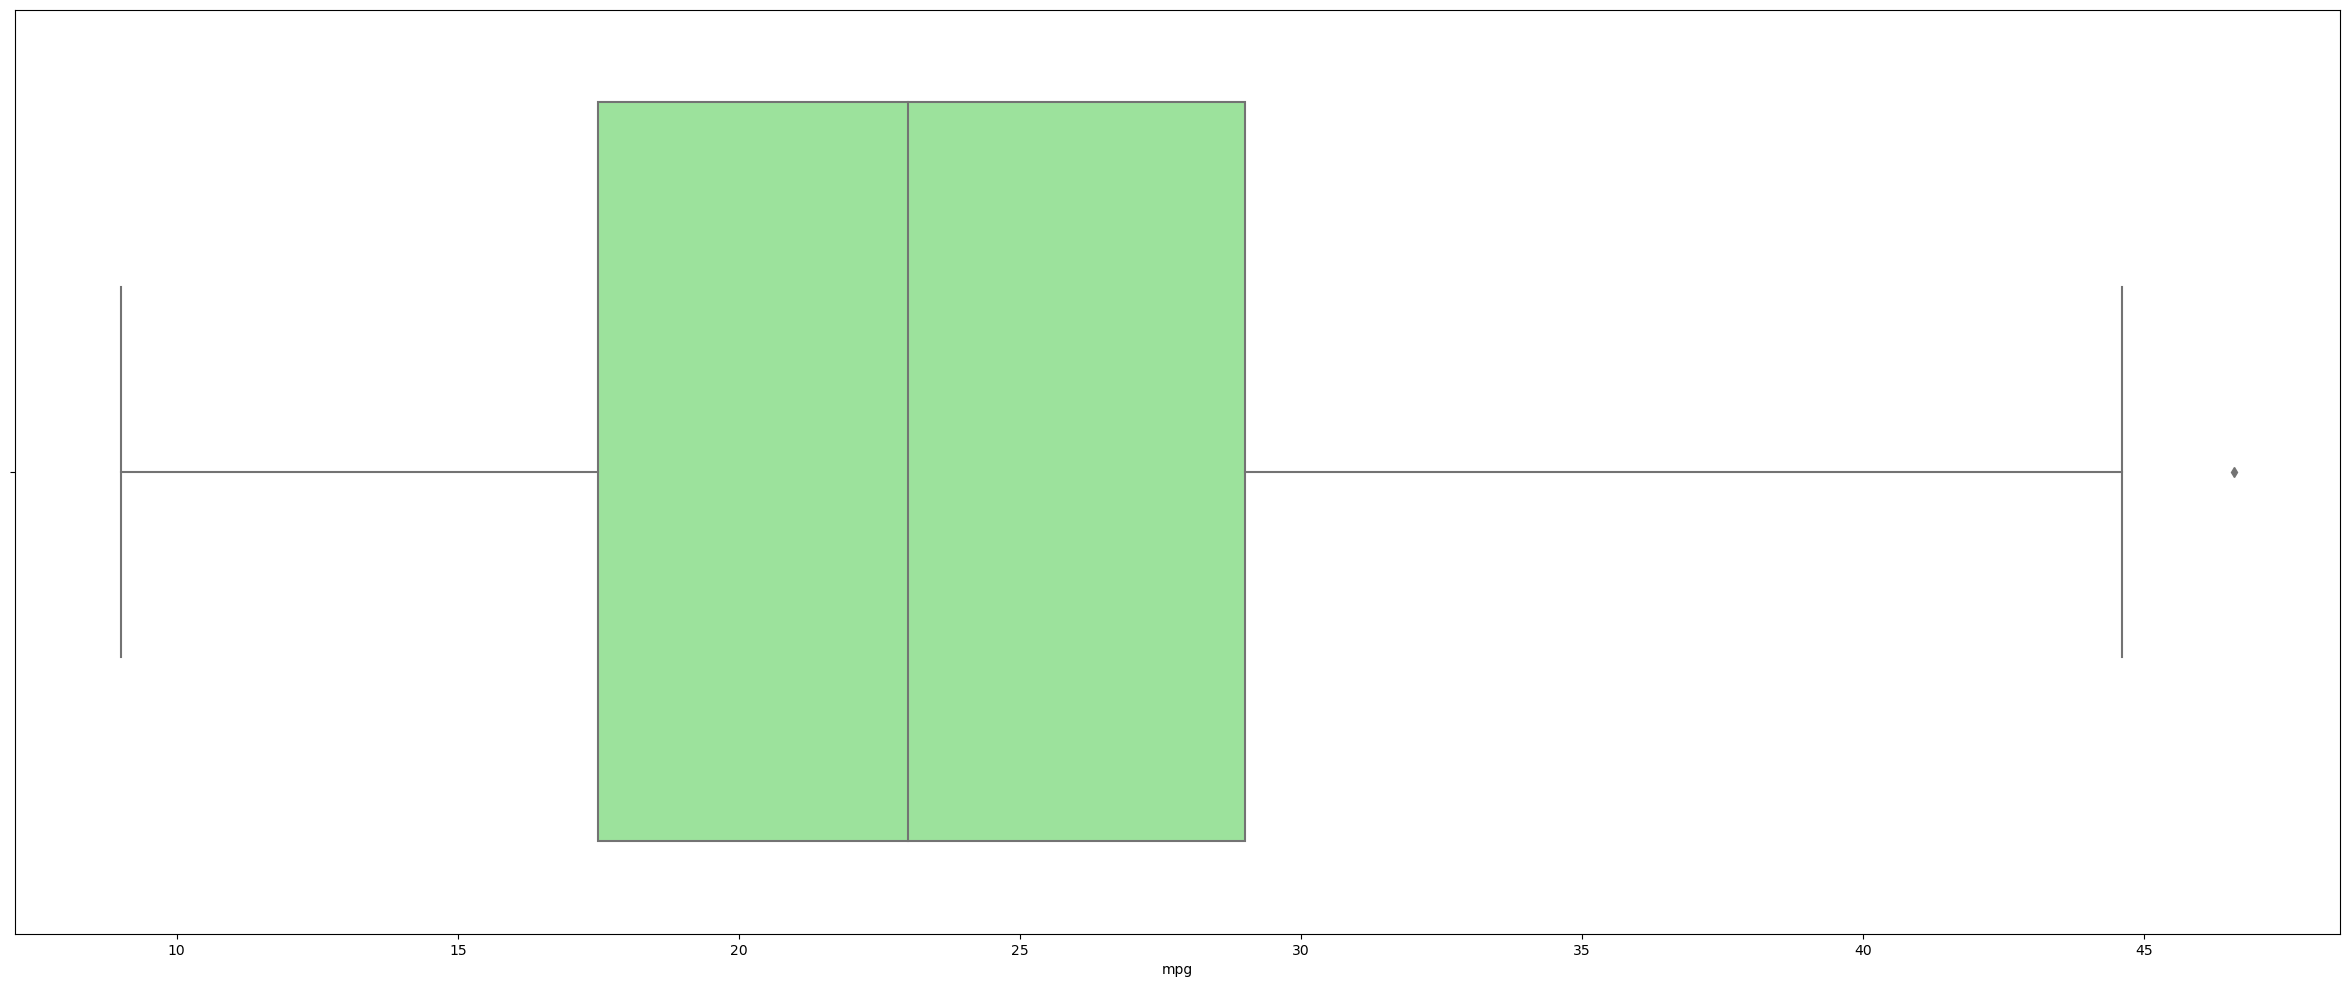

In [63]:
#plt.subplots(1,4,figsize=(16,5))
#plt.subplot(141)
#sns.boxplot(df['math score'],color='skyblue')
#plt.subplot(142)
#sns.boxplot(df['reading score'],color='hotpink')
#plt.subplot(143)
#sns.boxplot(df['writing score'],color='yellow')
#plt.subplot(144)
sns.boxplot(df['mpg'],color='lightgreen')
plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

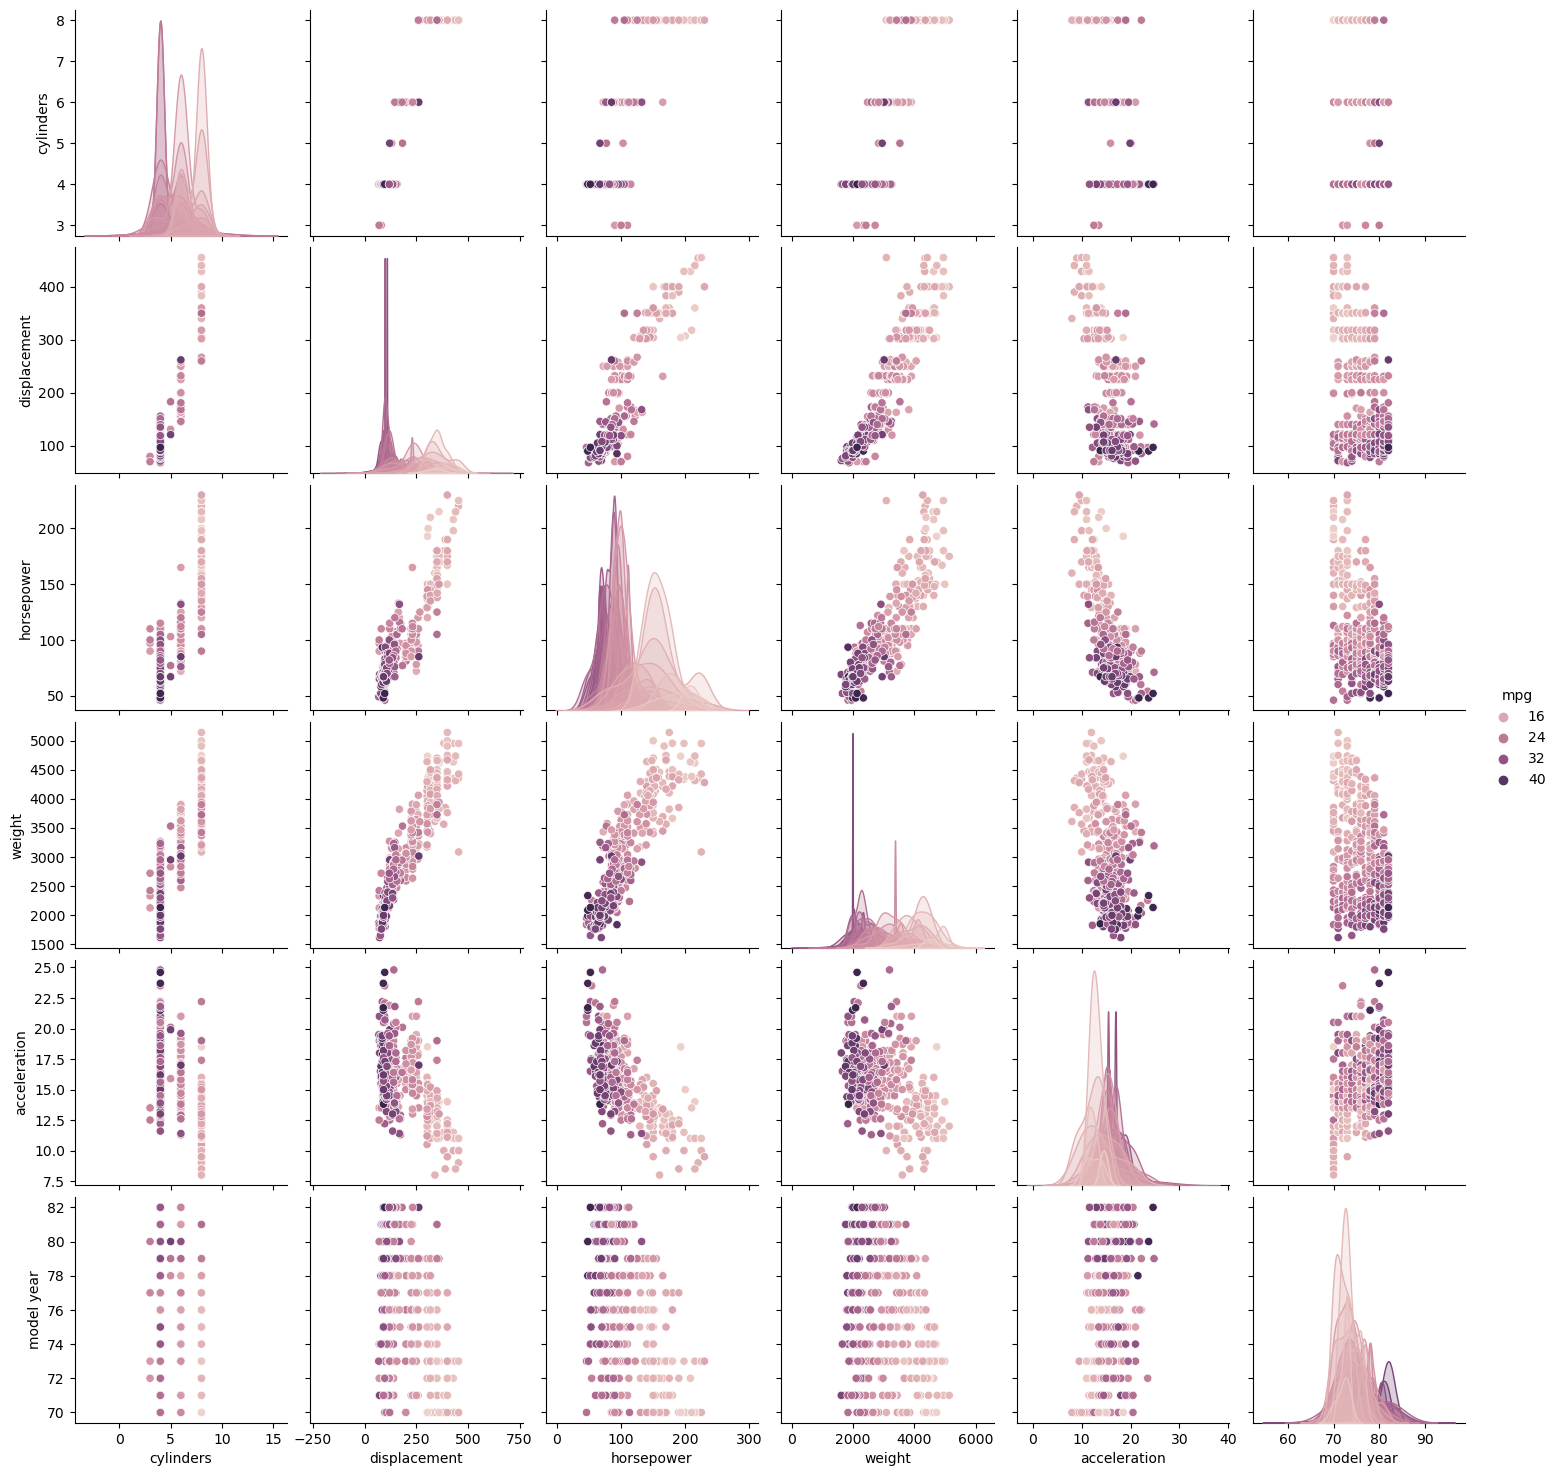

In [66]:
sns.pairplot(df,hue = 'mpg')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

In [67]:
# create dummy variable for the categorical column 'origin'
df = pd.get_dummies(df, ['origin'])
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_America,origin_Europe,origin_Japan
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,1,0,0


In [70]:
df.to_csv('data/clean_data.csv')

### 5. Conclusions
